# UC San Diego: Neural Data Science
## Final Project Title (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Sukhman Virk
- Yash Sharma
- Lucas Fasting
- Shrieyaa Sekar Jayanthi


# Overview

* Write a clear, 3-4 sentence summary of what you did and why.

<a id='research_question'></a>
# Research Question

How do the gene expression patterns correlate with the electrophysical properties of neurons across the different brain structures of humans and mice?

<a id='background'></a>

## Background & Prior Work

* In 2-3 paragraphs, describe the motivation behind your question. What’s the big picture, and why is it interesting? Are there published papers addressing aspects of your question? You should cite at least three primary references here. You are welcome to replicate published papers using publicly available data, just cite them and explain why!

    <p>Studying the connection between gene expression patterns and the electrophysiological properties of neurons is extremely important for understanding how brain functions emerge at the cellular level and the impact they have on the molecular level. Different brain regions involved in cognition, sensory processing, and motor control, exhibit specific characteristics that are influenced by their gene expression profiles and their electrophysiological properties. As a group, we are very interested in the inferences that can be made between human brain function and neural activity in mice. We find this interesting because these similarities can help scientists confirm whether discoveries made in mouse physiology can also be applied to humans.
    <p>Scientists, using machine learning techniques, have been able to capture large amounts of data and visualize complex information. Using modern technology we now have the power to carry out computationally heavy tasks that were previously not possible. When this data is displayed we can identify patterns and differences within the data to infer new insights. 
    <p>Several key studies have highlighted aspects of this complex relationship. Gouwens et al. (2020) correlated the transcriptomic and electrophysiological diversity in mouse visual cortical neurons, identifying unique neuronal types with distinct molecular and functional profiles. This study expands our knowledge of the molecular foundations of neuronal diversity, offering insights that could lead to a deeper understanding of how complex neural networks work.
    <p>Clancy et al. (2009) contributes to our understanding of cross-species correlations with a focus on the cortical GABAergic and subplate neural populations in mice, rats, and macaque species. The authors observed that these particular neurons have many different shapes and structures, which sets them apart from the more common type of neurons called pyramidal neurons, which is closely related to some of the findings from Gouwens et al. (2020).
    <p>Földy et al. (2016) demonstrated how specific gene expression patterns correspond to electrophysiological behaviors in human cortical neurons, assisting in our understanding of how the human brain functions. These studies, supported by resources like the Allen Brain Atlas, have created an in-depth view of how genetic and electrophysiological properties can be visualized with large-scale data. The Allen Brain Atlas has made it possible to make inferences about many kinds of data observed by the firing of action potentials. This gives us the chance to observe the behavior of neurons, helping doctors catch and diagnose neurological disorders before they worsen.


References (include links):
- 1) https://pubmed.ncbi.nlm.nih.gov/33186530/
- 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2779099/
- 3) https://pubmed.ncbi.nlm.nih.gov/27531958/
- 4) https://portal.brain-map.org/?utm_source=google&utm_medium=cpc&utm_campaign=brand_brainmaporg&gad_source=1&gclid=Cj0KCQjw_-GxBhC1ARIsADGgDjtsd3F3KRm0a_lF7V1HnmiDBTRpFChm8CFby2PwiNrXDjFz0NzB1fYaAlWDEALw_wcB
        

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Data Wrangling

* Explain steps taken to pull the data you need into Python.

In [33]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
data  = pd.read_csv('cell_types_specimen_details.csv').set_index('specimen__id')
print(data.shape)
data.columns

(2333, 53)


Index(['line_name', 'specimen__name', 'specimen__hemisphere', 'structure__id',
       'structure__name', 'structure__acronym', 'structure_parent__id',
       'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendrite_type', 'morph_thumb_path',
       'ephys_thumb_path', 'ep

# Data Cleaning

<p>To clean our dataset, we first identified and selected relevant columns essential for our analysis, focusing on brain structures, species, and key electrophysiological properties such as average firing rate and resting membrane potential. We filtered the dataset to include only these columns and then removed any rows with missing values to ensure a complete and accurate dataset for further analysis.


In [3]:
## YOUR CODE HERE
relevant_cols = [ 'structure__name', 'donor__species', 'ef__avg_firing_rate', 'ef__vrest', 'ef__upstroke_downstroke_ratio_long_square']

In [4]:
data_filtered = data[relevant_cols]
data_clean = data_filtered.dropna()
print(data_clean.shape)
data_clean.head()

(2176, 5)


,structure__name,donor__species,ef__avg_firing_rate,ef__vrest,ef__upstroke_downstroke_ratio_long_square
specimen__id,,,,,
525011903,"""frontal lobe""",Homo Sapiens,13.572511,-70.561035,2.895461
469801138,"""Primary visual area, layer 4""",Mus musculus,79.952029,-72.042976,1.162618
528642047,"""middle temporal gyrus""",Homo Sapiens,77.445126,-69.209610,1.891881
605889373,"""Primary visual area, layer 2/3""",Mus musculus,12.666099,-72.712036,3.379321
537256313,"""middle temporal gyrus""",Homo Sapiens,12.919897,-72.628105,3.121182


# Data Visualization

* This is a good place for some relevant visualizations related to any exploratory data analyses (EDA) you did after the basic cleaning.

In [5]:
human_df = data_clean[data_clean['donor__species'] == 'Homo Sapiens']
mouse_df = data_clean[data_clean['donor__species'] == 'Mus musculus']
combined_df = pd.concat([human_df, mouse_df])

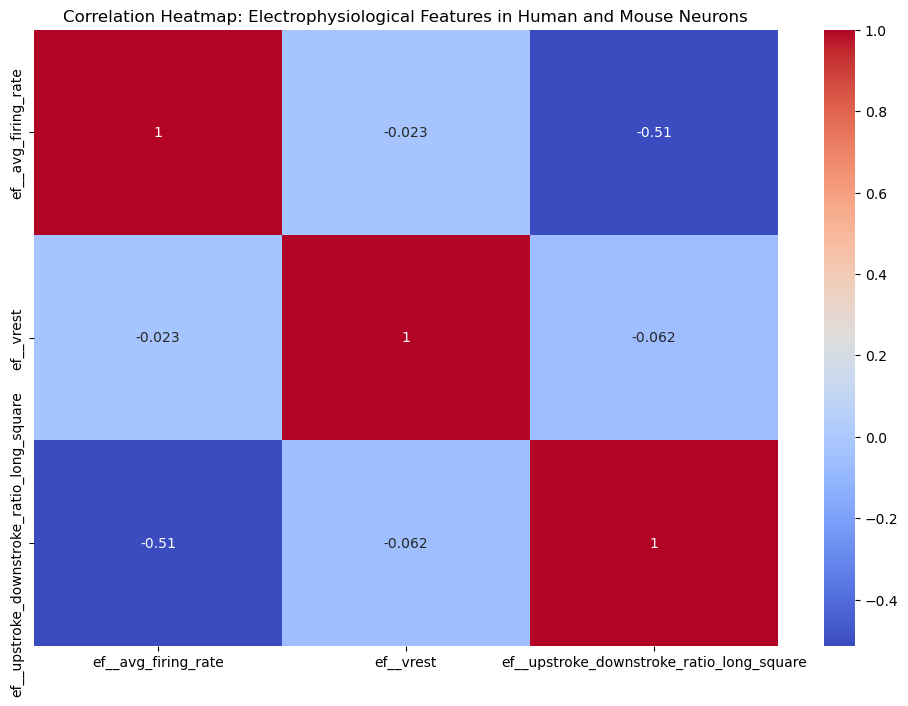

In [11]:
# Select electrophysiological features
electrophysiological_features = ['ef__avg_firing_rate', 'ef__vrest', 'ef__upstroke_downstroke_ratio_long_square']

# Calculate correlation matrix
combined_df_features = combined_df[electrophysiological_features]
correlation_matrix = combined_df[electrophysiological_features].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Electrophysiological Features in Human and Mouse Neurons")
plt.show()

<p> Need to explain this

## Scaling the data

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df_features)
scaled_df = pd.DataFrame(scaled_data, columns=electrophysiological_features)

## PCA

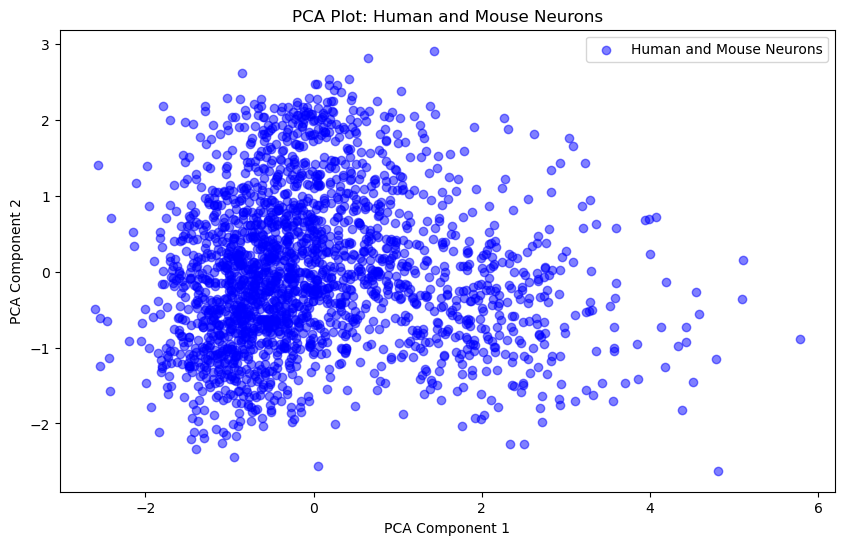

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.5, label='Human and Mouse Neurons')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot: Human and Mouse Neurons')
plt.legend()
plt.show()

Need to explain this

# Box and Whisker Plots

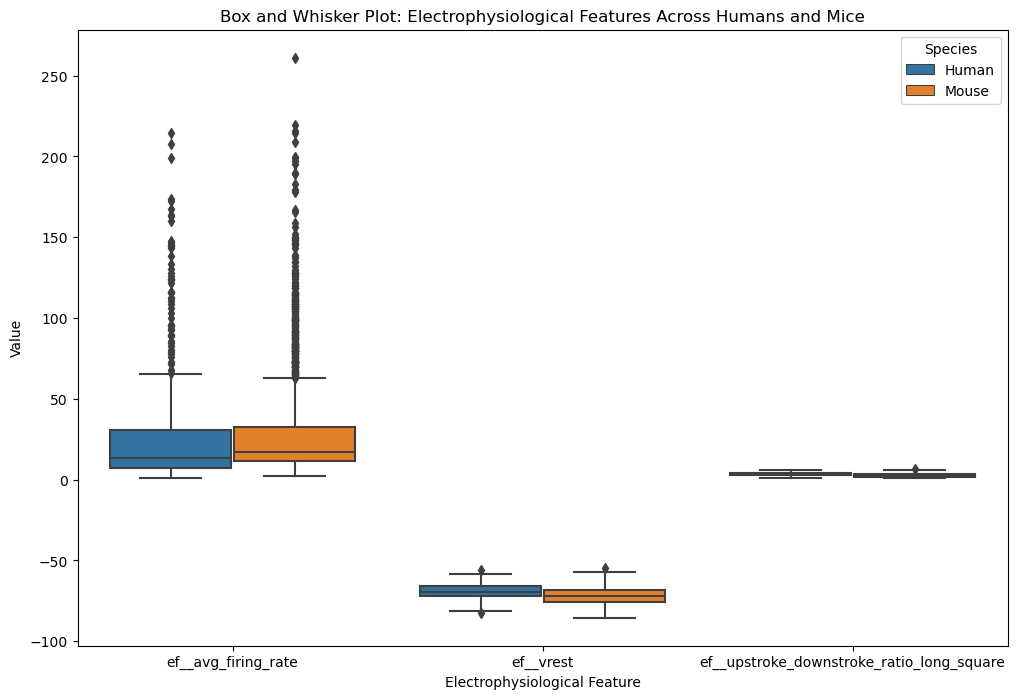

In [37]:
combined_df['Species'] = combined_df['donor__species'].apply(lambda x: 'Human' if x == 'Homo Sapiens' else 'Mouse')

# Melt the dataframe for easier plotting
melted_df = combined_df.melt(id_vars=['Species'], value_vars=relevant_cols[2:], 
                             var_name='Feature', value_name='Value')

# Plot the box and whisker plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Feature', y='Value', hue='Species', data=melted_df)
plt.title('Box and Whisker Plot: Electrophysiological Features Across Humans and Mice')
plt.xlabel('Electrophysiological Feature')
plt.ylabel('Value')
plt.legend(title='Species', loc='upper right')
plt.show()

Need to explain this

# Regression Plot

/Users/yash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

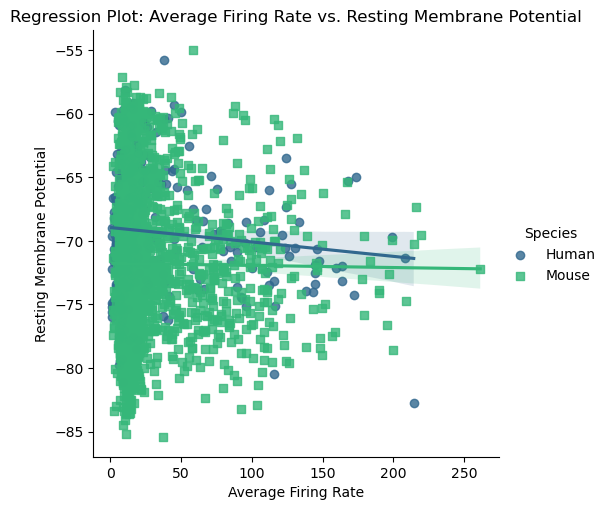

In [43]:
# Regression Plot: Visualize the relationship between 'ef__avg_firing_rate' and 'ef__vrest'
plt.figure(figsize=(10, 6))
sns.lmplot(x='ef__avg_firing_rate', y='ef__vrest', hue='Species', data=combined_df, markers=['o', 's'], palette='viridis')
plt.title('Regression Plot: Average Firing Rate vs. Resting Membrane Potential')
plt.xlabel('Average Firing Rate')
plt.ylabel('Resting Membrane Potential')
plt.show()

/var/folders/m2/gqz7y09s6f9gg466nv332fmc0000gn/T/ipykernel_97941/25684782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Species'] = data_clean['donor__species'].apply(lambda x: 1 if x == 'Homo Sapiens' else 0)


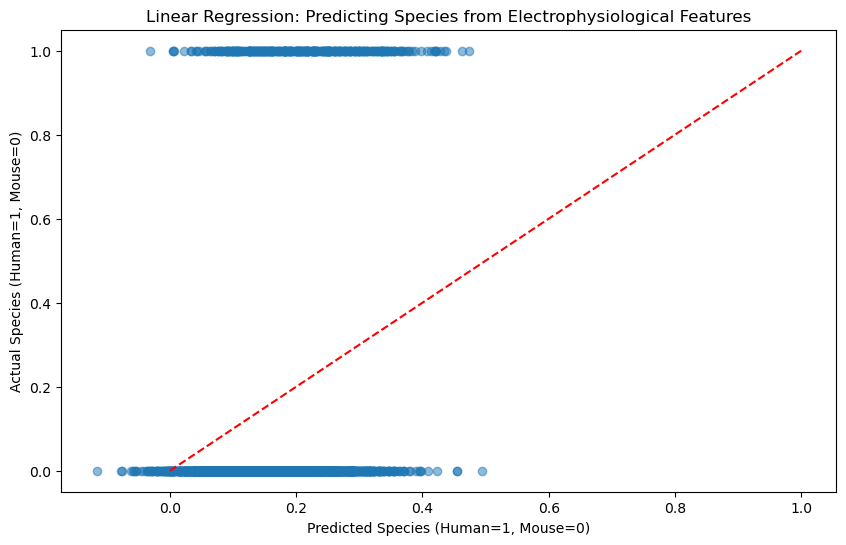

In [42]:
data_clean['Species'] = data_clean['donor__species'].apply(lambda x: 1 if x == 'Homo Sapiens' else 0)

# Select electrophysiological features and the species column
features = ['ef__avg_firing_rate', 'ef__vrest', 'ef__upstroke_downstroke_ratio_long_square']
X = data_clean[features]
y = data_clean['Species']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X_scaled, y)

# Predictions
y_pred = regressor.predict(X_scaled)

# Plot linear regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Predicted Species (Human=1, Mouse=0)')
plt.ylabel('Actual Species (Human=1, Mouse=0)')
plt.title('Linear Regression: Predicting Species from Electrophysiological Features')
plt.show()

Need to explain this

# Data Analysis & Results

* Include cells that describe the steps in your data analysis.
* You'll likely also have some visualizations here as well.

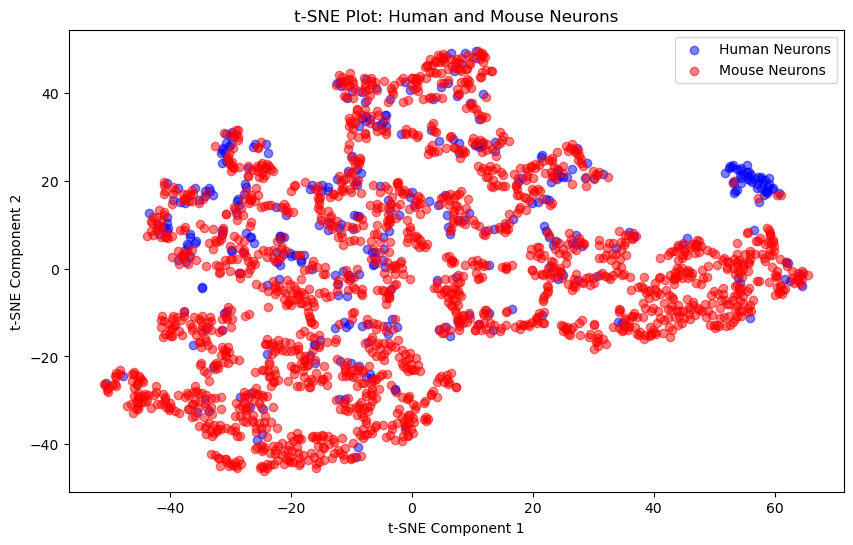

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create labels for human and mouse data
labels = combined_df['donor__species'].apply(lambda x: 'Human' if x == 'Homo Sapiens' else 'Mouse')

# Plot t-SNE results
plt.figure(figsize=(10, 6))
for label, color in zip(['Human', 'Mouse'], ['blue', 'red']):
    indices = (labels == label)
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], c=color, alpha=0.5, label=f'{label} Neurons')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot: Human and Mouse Neurons')
plt.legend()
plt.show()

Need to explain this

## TSNE With Scaled Data

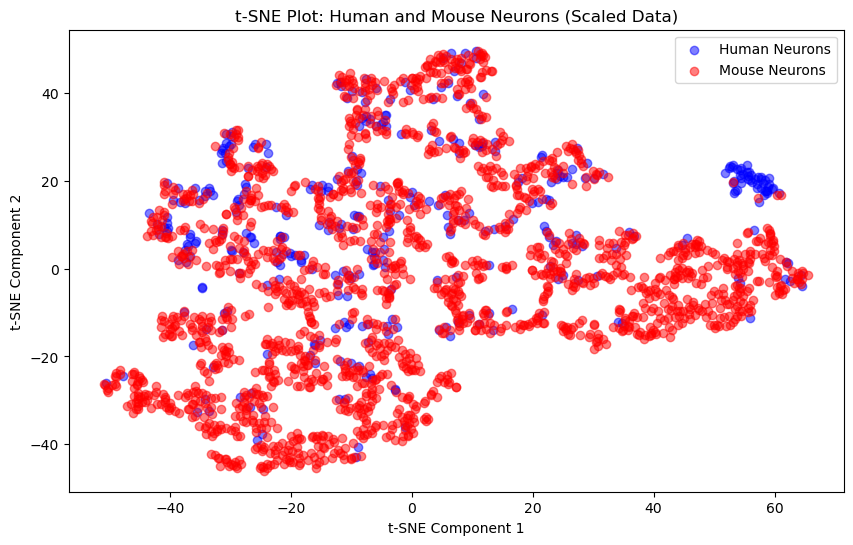

In [17]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create labels for human and mouse data
labels = combined_df['donor__species'].apply(lambda x: 'Human' if x == 'Homo Sapiens' else 'Mouse')

# Plot t-SNE results
plt.figure(figsize=(10, 6))
for label, color in zip(['Human', 'Mouse'], ['blue', 'red']):
    indices = (labels == label)
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], c=color, alpha=0.5, label=f'{label} Neurons')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot: Human and Mouse Neurons (Scaled Data)')
plt.legend()
plt.show()

Need to explain this

# Clustering 

## K-Means

Using elbow method to see optimal number of clusters

/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

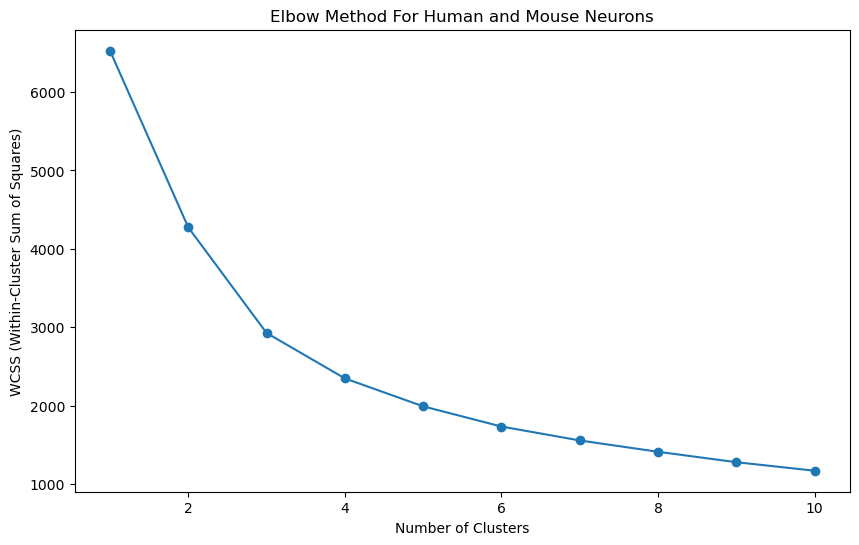

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Human and Mouse Neurons')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Need to explain this

/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


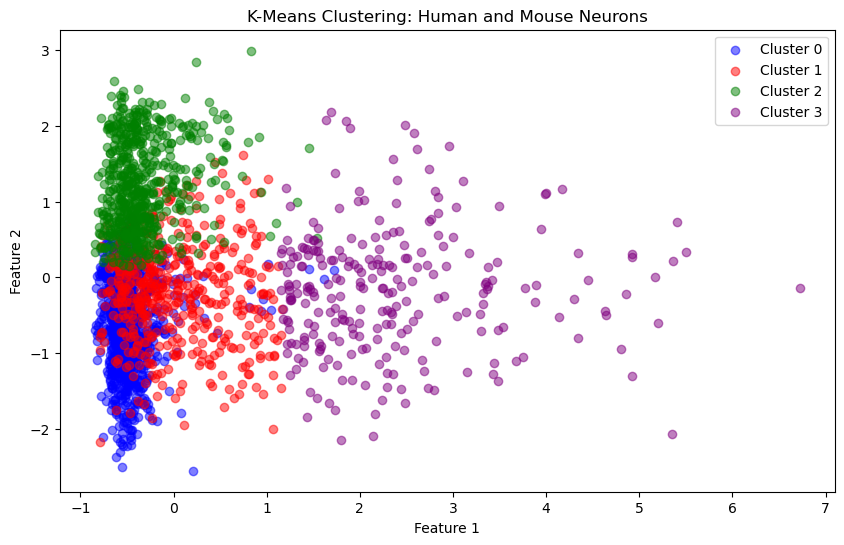

In [19]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Plot the K-Means clustering results
plt.figure(figsize=(10, 6))
for label, color in zip(range(optimal_clusters), ['blue', 'red', 'green', 'purple']):
    indices = (kmeans_labels == label)
    plt.scatter(scaled_data[indices, 0], scaled_data[indices, 1], c=color, alpha=0.5, label=f'Cluster {label}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering: Human and Mouse Neurons')
plt.legend()
plt.show()

Need to explain this

## DBScan

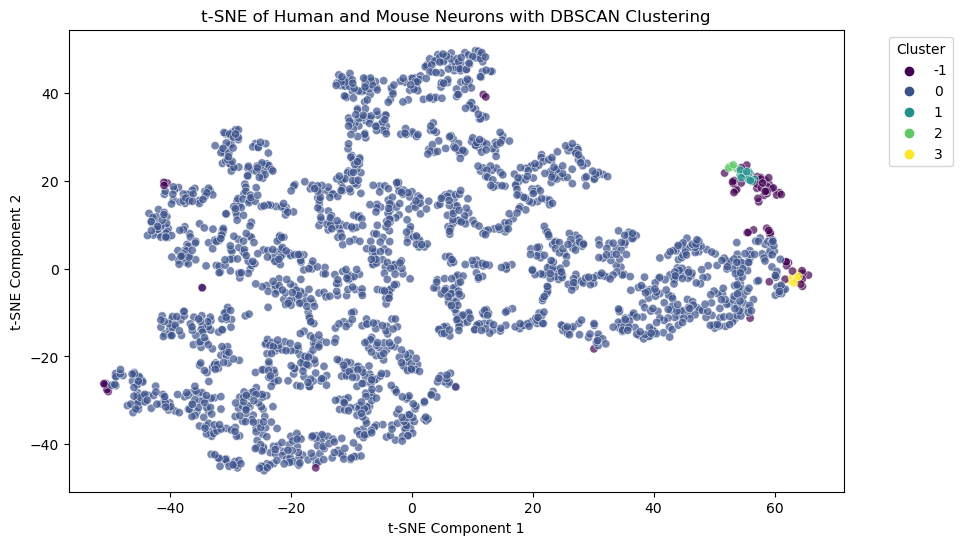

In [20]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=dbscan_labels, palette='viridis', alpha=0.7)
plt.title('t-SNE of Human and Mouse Neurons with DBSCAN Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Need to explain this

## DBSCAN With Scaled Data

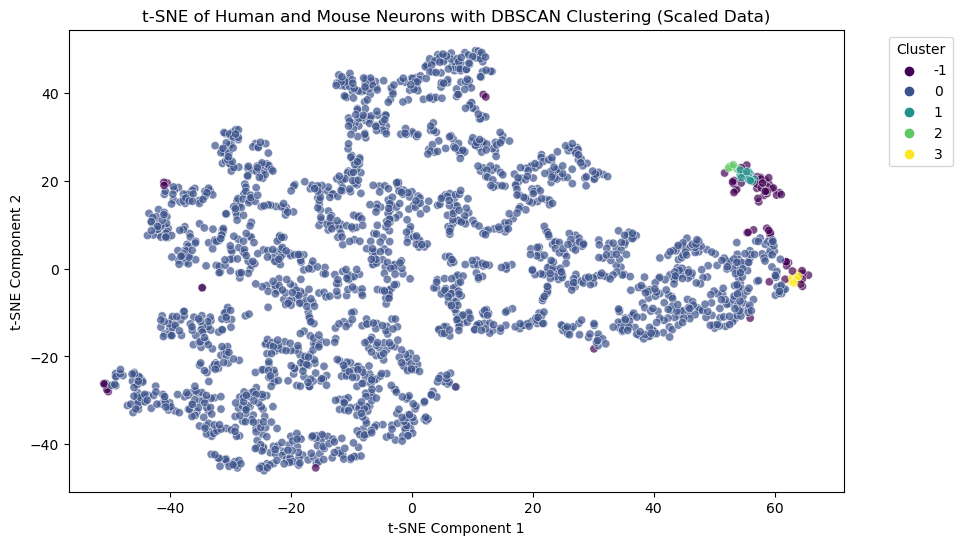

In [21]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=dbscan_labels, palette='viridis', alpha=0.7)
plt.title('t-SNE of Human and Mouse Neurons with DBSCAN Clustering (Scaled Data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Need to explain this

# Conclusion & Discussion

* Discussion of your results and how they address your experimental question(s).
* Discussed limitations of your analyses.
* You can also discuss future directions you'd like to pursue.